In [1]:
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import qutip as q
q.settings.colorblind_safe = True

import ipywidgets as widgets
from ipywidgets import GridspecLayout, interactive, Layout
from IPython.display import display

from Fock_space_func import solve_qed, result_qed
from Fock_space_func import compute_entropy, compute_truncation
from Fock_space_func import plot_pos_entropy, plot_fock_space_trunc
from Fock_space_func import find_optimal_truncation
from Fock_space_func import print_truncation_statistics, print_optimal_points_summary, print_detailed_threshold_analysis, print_recommendations

from tqdm import tqdm

%matplotlib widget
%matplotlib ipympl
%load_ext line_profiler

In [2]:
# Create data grid
N_vals = np.linspace(2, 50, 50-2+1)  # Reduced for testing
M_vals = np.linspace(2, 50, 50-2+1)  # Reduced for testing
Ns, Ms = np.meshgrid(N_vals, M_vals)

In [ ]:
results = result_qed(N_vals, M_vals, Ns, Ms) # This takes a while - 30 mins....

Solving master equations:   0%|                                                         | 0/49 [00:00<?, ?it/s]C:\Users\tobia\Desktop\Clones\SCIQIS-2025-Intro\.venv\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
C:\Users\tobia\Desktop\Clones\SCIQIS-2025-Intro\.venv\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
Solving master equations:  27%|████████████▋                                   | 13/49 [01:09<05:29,  9.15s/it]

In [4]:
print("Computing entropy matrix...")
entropy_matrix = compute_entropy(results)

Computing entropy matrix...


Progress: 100%|████████████████████████████████████████████████████████████| 2401/2401 [00:54<00:00, 44.44it/s]


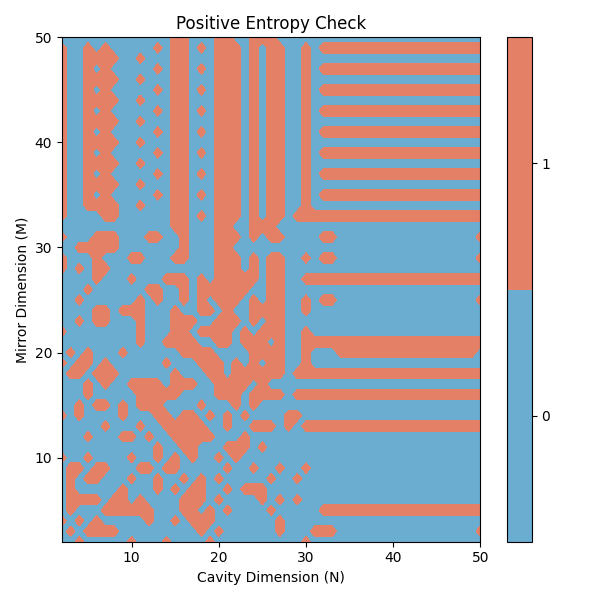

In [5]:
plot_pos_entropy(Ns, Ms, entropy_matrix)

In [6]:
print("Computing truncation matrix...")
truncation_matrix = compute_truncation(Ns, Ms, results, 0.992)

Computing truncation matrix...


Progress: 100%|██████████████████████████████████████████████████████████| 2401/2401 [00:00<00:00, 3119.33it/s]


TypeError: 'float' object cannot be interpreted as an integer

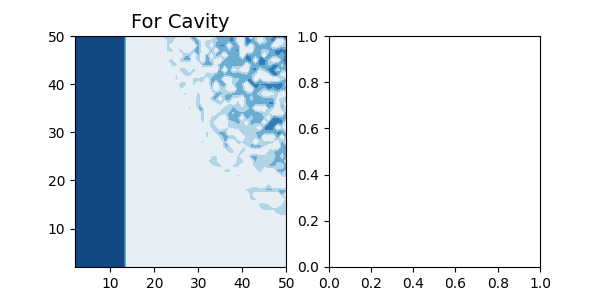

In [7]:
plot_fock_space_trunc(Ns, Ms, N_vals, M_vals, truncation_matrix)

In [12]:
# Print all statistics
stats = print_truncation_statistics(truncation_matrix[0], N_vals, M_vals)

# Find optimal points
optimal_points, _ = find_optimal_truncation(truncation_matrix[0], N_vals, M_vals, 40)

# Print optimal points summary
print_optimal_points_summary(optimal_points)

# Print threshold analysis
print_detailed_threshold_analysis(truncation_matrix[0])

# Print recommendations
print_recommendations(truncation_matrix[0], N_vals, M_vals)

┌────────────────────────────────────────────────┐
│           TRUNCATION MATRIX STATISTICS         │
├────────────────────────────────────────────────┤
│ Mean                                    26.783 │
│ Median                                  27.000 │
│ Maximum                                 50.000 │
│ Minimum                                  0.000 │
│ Standard Deviation                      20.204 │
│ Points ≥ 40                                923 │
│ Points ≥ 50                                758 │
│ Points ≥ 60                                  0 │
│ Points ≥ 70                                  0 │
│ Total Points                              2401 │
│ Percentage ≥ 40                          38.4% │
│ Percentage ≥ 50                          31.6% │
│ N Range                             2.0 - 50.0 │
│ M Range                             2.0 - 50.0 │
│ Grid Size                              49 × 49 │
└────────────────────────────────────────────────┘

OPTIMAL POINTS SUMMARY (Trunca